In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Hàm đánh giá OneMax
def onemax(ind):
    return np.sum(ind)
# Hàm đánh giá Leading Ones
def leadingones(ind):
    return np.argmax(ind == 0)

In [5]:
# Chọn lọc theo tỷ lệ (Proportional Selection)
def proportional_selection(pop, pop_fitness, selection_size):
    fitness_sum = np.sum(pop_fitness)
    probabilities = pop_fitness / fitness_sum
    selected_indices = np.random.choice(len(pop), size=selection_size, p=probabilities)
    return pop[selected_indices]

In [6]:
# Chọn lọc giao đấu (Tournament Selection)
def tournament_selection(pop, pop_fitness, selection_size, tournament_size=4):
    selected_indices = []
    for _ in range(selection_size):
        tournament_indices = np.random.choice(len(pop), size=tournament_size)
        tournament_fitness = pop_fitness[tournament_indices]
        winner_index = tournament_indices[np.argmax(tournament_fitness)]
        selected_indices.append(winner_index)
    return pop[selected_indices]

In [7]:
# Lai ghép một điểm (1-point crossover)
def one_point_crossover(parent1, parent2):
    point = np.random.randint(1, len(parent1) - 1)
    child1 = np.concatenate([parent1[:point], parent2[point:]])
    child2 = np.concatenate([parent2[:point], parent1[point:]])
    return child1, child2

In [8]:
# Lai ghép đồng nhất (Uniform crossover)
def uniform_crossover(parent1, parent2):
    mask = np.random.rand(len(parent1)) > 0.5
    child1 = np.where(mask, parent1, parent2)
    child2 = np.where(mask, parent2, parent1)
    return child1, child2

In [9]:


# Hàm giải thuật di truyền (Genetic Algorithm)
def genetic_algorithm(objective, selection_function, crossover_function, num_individuals, num_parameters, max_evaluations, n_trials):
    history = []
    for _ in range(n_trials):
        pop = np.random.randint(2, size=(num_individuals, num_parameters))
        pop_fitness = np.array([objective(ind) for ind in pop])
        best_fitness = [np.max(pop_fitness)]
        evaluations = num_individuals

        while evaluations < max_evaluations:
            selected = selection_function(pop, pop_fitness, num_individuals)
            next_gen = []
            for i in range(0, num_individuals, 2):
                parent1, parent2 = selected[i], selected[i+1]
                child1, child2 = crossover_function(parent1, parent2)
                next_gen.extend([child1, child2])
            pop = np.array(next_gen)
            pop_fitness = np.array([objective(ind) for ind in pop])
            best_fitness.append(np.max(pop_fitness))
            evaluations += num_individuals

        history.append(best_fitness)
    return np.array(history)


In [10]:
# Cài đặt thực nghiệm
n_trials = 10
settings = [
    {"problem": onemax, "bits": 50, "max_evaluations": 50000, "population_size": 16},
    {"problem": onemax, "bits": 100, "max_evaluations": 100000, "population_size": 64},
    {"problem": leadingones, "bits": 10, "max_evaluations": 50000, "population_size": 16},
    {"problem": leadingones, "bits": 20, "max_evaluations": 100000, "population_size": 64},
]

results = {}

for setting in settings:
    problem = setting["problem"]
    bits = setting["bits"]
    max_evaluations = setting["max_evaluations"]
    population_size = setting["population_size"]

    key = f"{problem.__name__}_{bits}bits"

    results[key] = {
        "GA_1X": genetic_algorithm(problem, proportional_selection, one_point_crossover, population_size, bits, max_evaluations, n_trials),
        "GA_UX": genetic_algorithm(problem, proportional_selection, uniform_crossover, population_size, bits, max_evaluations, n_trials),
        "POPOP_1X": genetic_algorithm(problem, tournament_selection, one_point_crossover, population_size, bits, max_evaluations, n_trials),
        "POPOP_UX": genetic_algorithm(problem, tournament_selection, uniform_crossover, population_size, bits, max_evaluations, n_trials),
    }

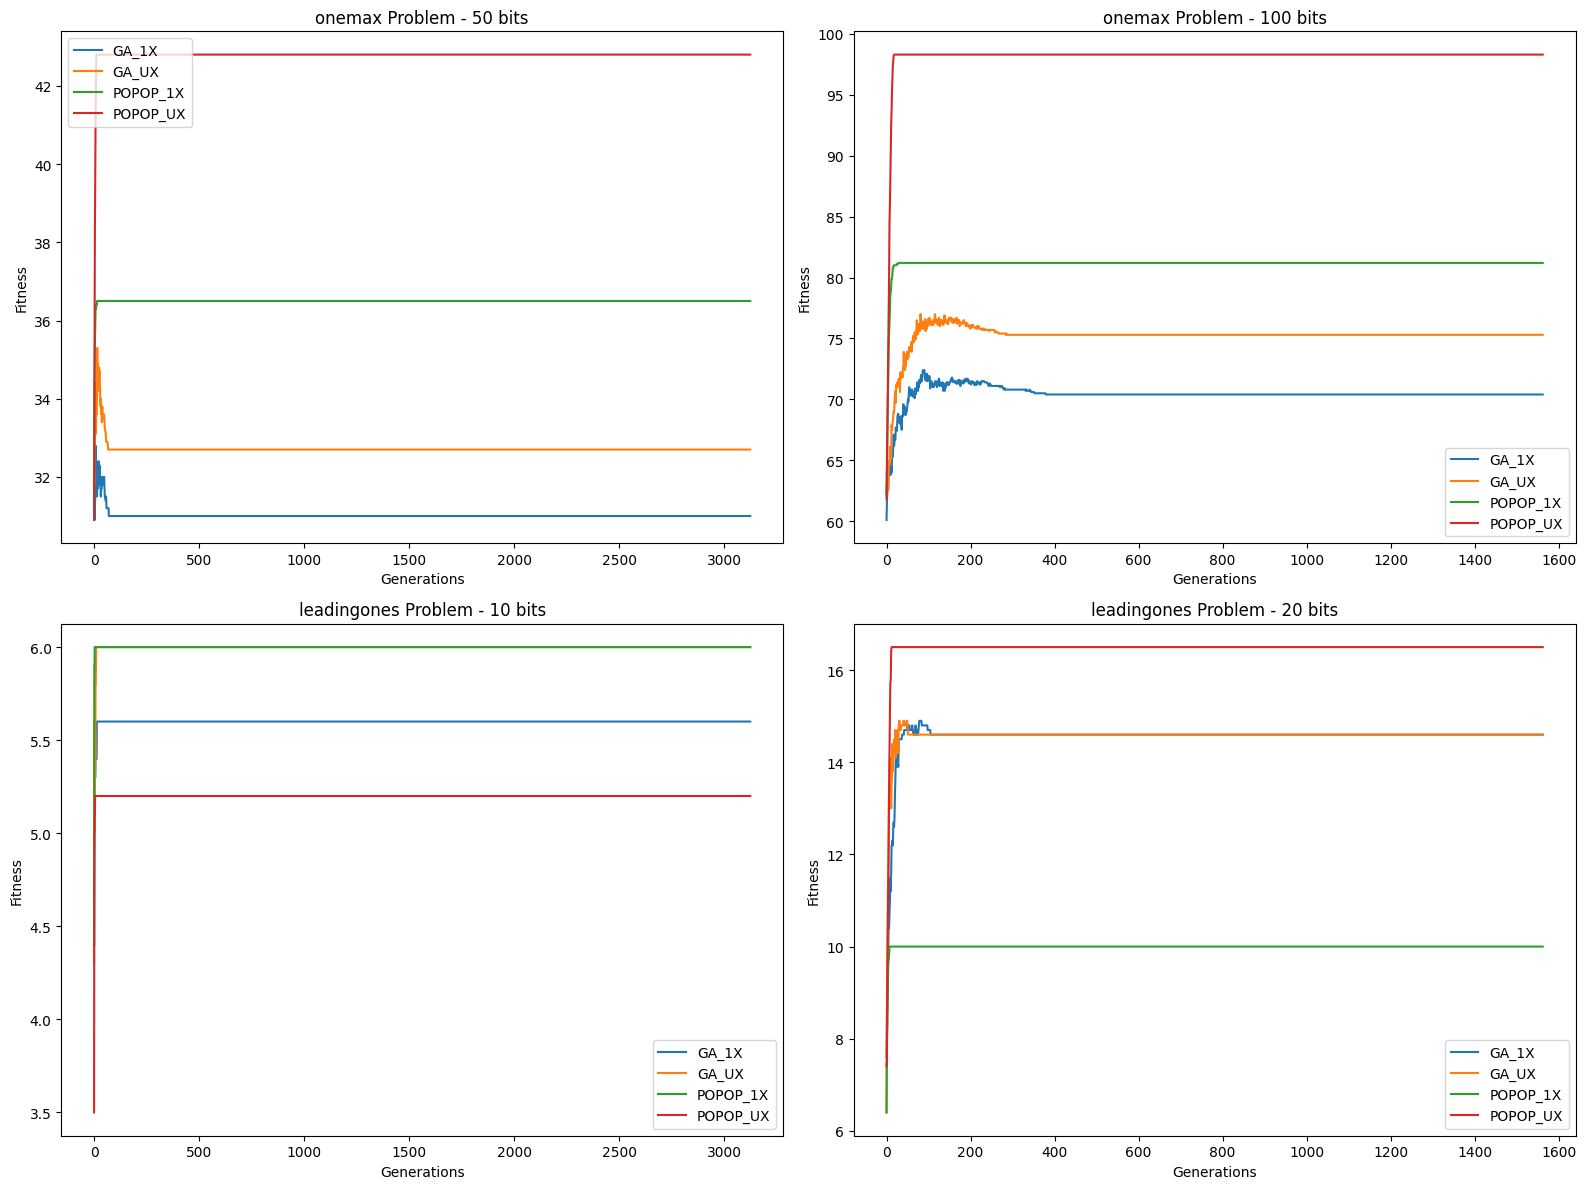

In [11]:
# Vẽ đồ thị kết quả
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, setting in enumerate(settings):
    problem_name = setting["problem"].__name__
    bits = setting["bits"]
    key = f"{problem_name}_{bits}bits"
    ax = axes[i]

    for method, data in results[key].items():
        avg_fitness = np.mean(data, axis=0)
        ax.plot(avg_fitness, label=method)

    ax.set_title(f"{problem_name} Problem - {bits} bits")
    ax.set_xlabel("Generations")
    ax.set_ylabel("Fitness")
    ax.legend()

plt.tight_layout()
plt.show()

## 1. So sánh giữa 1-point crossover và uniform crossover (1X vs UX):
OneMax Problem (50 bits và 100 bits):

*a. 50 bits:*

>POPOP_UX đạt được fitness cao nhất nhanh nhất, cho thấy UX có khả năng duy trì các cá thể tốt và thúc đẩy tiến hóa hiệu quả hơn trong phiên bản POPOP.
POPOP_1X cũng cho kết quả tốt nhưng thấp hơn so với POPOP_UX, cho thấy 1X có thể không khai thác tốt bằng UX trong trường hợp này.
GA_UX và GA_1X có fitness thấp hơn đáng kể so với POPOP, điều này chỉ ra rằng POPOP có lợi thế rõ rệt hơn trong việc duy trì và khai thác các cá thể tốt.

*b. 100 bits:*

>Một lần nữa, POPOP_UX đạt fitness cao nhất rất nhanh, vượt trội so với các phương pháp khác.
GA_UX và GA_1X đạt được fitness thấp hơn POPOP, với GA_UX tốt hơn một chút so với GA_1X.
POPOP_1X vẫn đạt kết quả tốt nhưng không nhanh bằng POPOP_UX.
Leading Ones Problem (10 bits và 20 bits):

*c. 10 bits:*

>POPOP_UX cũng vượt trội hơn so với các phương pháp khác, đạt fitness cao nhất rất nhanh chóng.
GA_1X và GA_UX có kết quả tương đương nhưng thấp hơn POPOP.
POPOP_1X cũng đạt được kết quả tốt nhưng không nhanh bằng POPOP_UX.

*d. 20 bits:*

> Tương tự như trường hợp 10 bits, POPOP_UX lại vượt trội với fitness cao nhất.
GA_1X, GA_UX, và POPOP_1X đạt fitness tương đối gần nhau, nhưng tất cả đều thấp hơn so với POPOP_UX.

## 2. So sánh giữa GA tiêu chuẩn và POPOP:
* a. Hiệu năng trên bài toán OneMax:

    > POPOP_UX vượt trội hơn rõ rệt so với tất cả các phương pháp khác, cho thấy UX trong POPOP có khả năng duy trì và cải thiện các cá thể tốt hơn nhiều so với GA tiêu chuẩn.
    POPOP_1X cũng hoạt động tốt hơn so với GA_1X và GA_UX, điều này chỉ ra rằng POPOP nhìn chung là một phương pháp hiệu quả hơn cho bài toán OneMax.
* b. Hiệu năng trên bài toán Leading Ones:

    > Kết quả tương tự như trên, POPOP_UX vượt trội hơn đáng kể so với các phương pháp khác.
    Điều này cho thấy rằng POPOP đặc biệt hiệu quả cho cả hai bài toán, đặc biệt khi sử dụng UX.

## 3. Nhận xét chung và kết luận:
Phép lai ghép nào phù hợp hơn?

> UX rõ ràng là lựa chọn tốt hơn trong các bài toán này, đặc biệt khi kết hợp với POPOP. UX giúp duy trì đa dạng di truyền và cải thiện khả năng tìm kiếm giải pháp tốt hơn.
GA phiên bản gốc hay POPOP đạt hiệu năng cao hơn?

> POPOP rõ ràng là hiệu quả hơn trong cả hai bài toán, cho thấy rằng việc kết hợp cha mẹ và con cái để chọn lọc lại quần thể có thể dẫn đến các kết quả tốt hơn so với GA tiêu chuẩn.